# import

In [1]:
import pandas as pd

In [2]:
curr_facc_unprune = pd.read_csv("beginner.csv")
census_unprune = pd.read_csv("sc-est2019-agesex-civ.csv")
bc_deaths = pd.read_csv("USCSOverviewMap.csv")

# mapping

In [3]:
# from rogerallen on github
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

# prune data

In [4]:
# facilities
curr_facc = curr_facc_unprune[["Facility Name", "State", "Zip Code", "Phone"]]

# census
census = census_unprune[census_unprune["SEX"] == 2]
census = census[census["AGE"] >= 40]
# census = census[census["AGE"] <= 74]
census = census[["STATE", "AGE", "ESTBASE2010_CIV", "POPEST2010_CIV", "POPEST2011_CIV", "POPEST2012_CIV", "POPEST2013_CIV", "POPEST2014_CIV", "POPEST2015_CIV", "POPEST2016_CIV", "POPEST2017_CIV", "POPEST2018_CIV", "POPEST2019_CIV"]]
bc_deaths = bc_deaths[["Area", "Death Count"]]

## reorganize data

In [5]:
curr_facc.head()

,Facility Name,State,Zip Code,Phone
0,Ohana Memorials Mammography Services,WA,98902,509574-3863
1,31 Medical Group Aviano AB,Air Post Office,AE,9604
2,35th Medical Group Misawa AB Japan,AP,96319-5300,8.13118E+11
3,374th MDG Unit 5225 SGCR Yokota AB APO AP 96328,AP,96328,425522510
4,375th Medical Group,IL,62225-5252,618256-1494


In [6]:
# 0 = faccility name
# 1 = state name
# 2 = phone
for (index, info_array) in curr_facc.iterrows():
    try:
        if (type(info_array[1]) != str):
            if (len(info_array[2]) == 2):
                info_array[1] = info_array[2]
            elif (len(info_array[3]) == 2):
                info_array[1] = info_array[3]
            else:
                info_array[1] = None
        elif (len(info_array[1]) != 2):
            if (len(info_array[2]) == 2):
                info_array[1] = info_array[2]
            elif (len(info_array[3]) == 2):
                info_array[1] = info_array[3]
            else:
                info_array[1] = None
    except:
        continue
curr_facc.isna()
curr_facc = curr_facc.dropna()
curr_facc = curr_facc[["State", "Phone"]] # phone is going to be count
curr_facc.head()

,State,Phone
0,WA,509574-3863
1,AE,9604
2,AP,8.13118E+11
3,AP,425522510
4,IL,618256-1494


In [7]:
for (index, info_array) in bc_deaths.iterrows():
    bc_deaths.at[index, bc_deaths.columns[0]] = us_state_to_abbrev.get(info_array[0])
    print(info_array[0])
display(bc_deaths)

Wyoming
North Dakota
Alaska
Vermont
District of Columbia
South Dakota
Delaware
Rhode Island
Montana
Maine
Hawaii
New Hampshire
Idaho
Nebraska
West Virginia
Utah
New Mexico
Arkansas
Iowa
Kansas
Puerto Rico
Mississippi
Connecticut
Nevada
Oklahoma
Oregon
Colorado
Minnesota
Kentucky
Louisiana
Wisconsin
Alabama
South Carolina
Massachusetts
Maryland
Missouri
Indiana
Arizona
Washington
Tennessee
Virginia
New Jersey
Georgia
North Carolina
Michigan
Ohio
Illinois
Pennsylvania
New York
Texas
Florida
California


,Area,Death Count
0,WY,62
1,ND,67
2,AK,68
3,VT,79
4,DC,97
5,SD,107
6,DE,141
7,RI,142
8,MT,156
9,ME,192


## plot

In [8]:
curr_facc.head()

,State,Phone
0,WA,509574-3863
1,AE,9604
2,AP,8.13118E+11
3,AP,425522510
4,IL,618256-1494


<AxesSubplot:xlabel='State'>

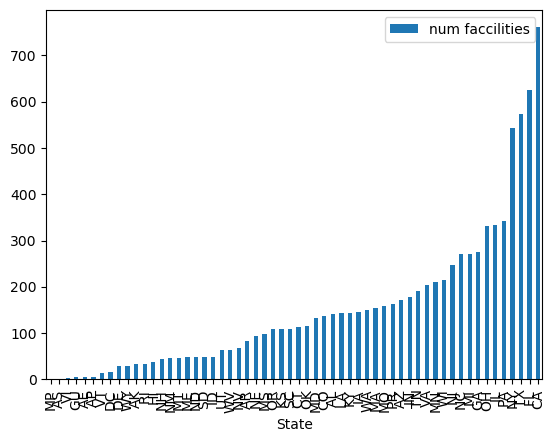

In [9]:
# curr_facc.groupby(['State']).count().to_csv(path_or_buf = "data.csv")
curr_facc = curr_facc.rename(columns = {'Phone':'num faccilities'})
curr_facc = curr_facc.groupby(['State']).count().sort_values(by='num faccilities')
curr_facc.plot.bar()

In [10]:
bc_deaths.head()
bc_deaths = bc_deaths.rename(columns = {'Area':'State'})

<AxesSubplot:xlabel='State'>

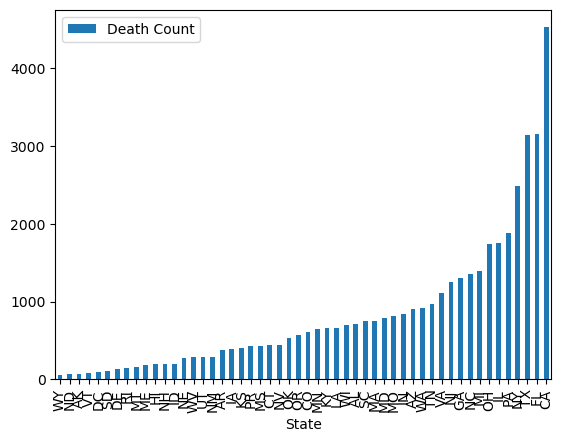

In [11]:
bc_deaths.plot.bar(x = "State", y = "Death Count")

In [12]:
unified = pd.merge(curr_facc, bc_deaths, on='State')
display(unified)

,State,num faccilities,Death Count
0,VT,15,79
1,DC,16,97
2,DE,30,141
3,WY,30,62
4,AK,33,68
5,RI,34,142
6,HI,37,193
7,NH,44,201
8,NM,46,288
9,MT,47,156


In [13]:
unified = unified.assign(new_col=unified['Death Count'] / unified['num faccilities'])
unified = unified.rename(columns = {'new_col':'death to facility'})
unified = unified.sort_values(by='death to facility', ascending=False)
display(unified)

,State,num faccilities,Death Count,death to facility
22,SC,110,751,6.827273
16,NV,69,440,6.376812
8,NM,46,288,6.260870
31,WA,149,916,6.147651
1,DC,16,97,6.062500
25,MD,132,789,5.977273
51,CA,760,4527,5.956579
49,TX,574,3145,5.479094
47,PA,343,1879,5.478134
38,VA,205,1111,5.419512


In [15]:
unified.to_csv("result.csv")